In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, GRU, Embedding, Conv1D, Conv2D, Conv3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD



In [2]:
print(tf.version)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


<module 'tensorflow._api.v2.version' from 'C:\\Users\\Miguel\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
Num GPUs Available:  1


In [3]:
#Cargamos el dataset
import pathlib
data_dir = r"C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\ICHBI\DATASETS\CICLOS_SINFILTRO\Desbalanceado_4_clases\dataset"
data_dir = pathlib.Path(data_dir)


In [4]:
#comprobamos que esta cargado correctamente
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)


6898


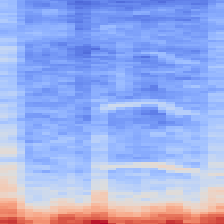

In [5]:
#obtenemos un ejemplo
crackles = list(data_dir.glob('both/*'))
PIL.Image.open(str(crackles[0]))


In [6]:
altura_imagen, anchura_imagen = 224, 224
batch_size = 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen, anchura_imagen),
    batch_size=batch_size)


Found 6898 files belonging to 4 classes.
Using 5519 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen, anchura_imagen),
    batch_size=batch_size)


Found 6898 files belonging to 4 classes.
Using 1379 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)


['both', 'crackles', 'empty', 'wheezes']


In [9]:
resnet_model = tf.keras.models.load_model(
    r'C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\Codigo\ModelosEntrenados\VGG16_DisBalanced4_SinFiltro_Base_80_20.h5')
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100      
Total params: 15,244,100
Trainable params: 529,412
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
inference_time = resnet_model.evaluate(val_ds, batch_size=1, verbose=1)
    



22/22 [==============================] - 4s 168ms/step - loss: 2.0845 - accuracy: 0.6004
